# Assignment - Part 1

## Part 1.1

Use library scripts to generate p-ER random graphs and r-regular random graph. Let K denote the number of nodes.

In [ ]:
import networkx as nx
import time
import numpy as np
import random as rm
import matplotlib.pyplot as plt
from numpy.random.mtrand import randint
import pandas as pd

In [ ]:
# K number of nodes
K = 100

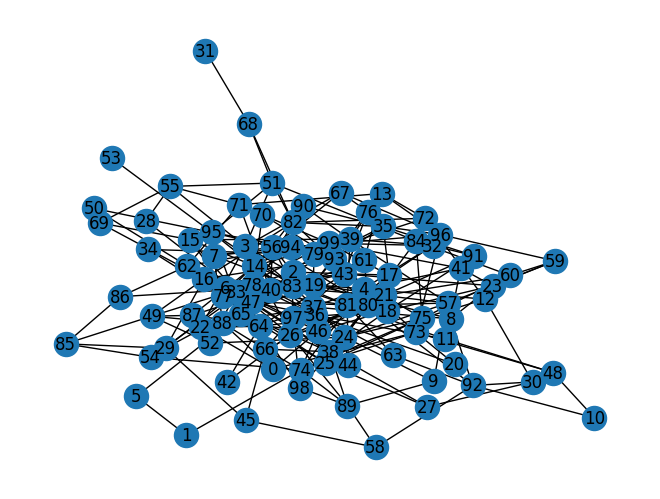

In [ ]:
# ERDOS RENYI RANDOM GRAPH
p = 0.05 #probability that there is an edge between two nodes
G = nx.erdos_renyi_graph(K, p)
nx.draw(G, with_labels=True)
plt.show()


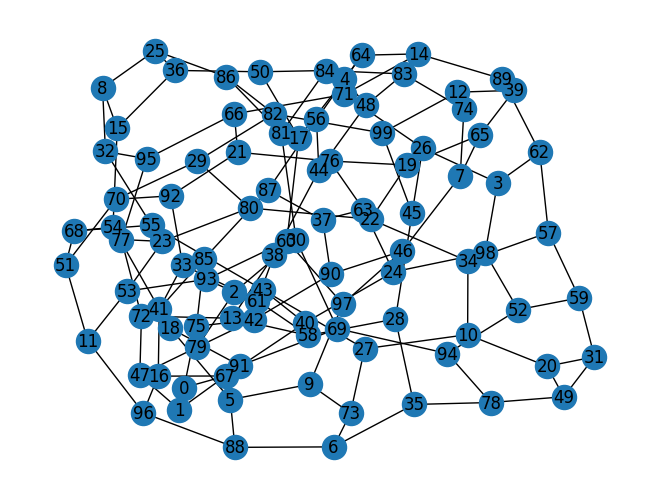

In [ ]:
# R-REGULAR RANDOM GRAPH
d = 3 #degree of each node
H = nx.random_regular_graph(d, K)
nx.draw(H, with_labels=True)
plt.show()

## Part 1.2

Define the functions for calculating the 3 algorithms:

• algebric method 1 (irreducibility);

• algebric method 2 (eigenvalue of the Laplacian matrix);

• breadth-first search algorithm.

In [ ]:
def Irreducibility(graph):
  adj_matrix = nx.to_numpy_array(graph)
  n = adj_matrix.shape[0]

  powered_matrix = np.linalg.matrix_power(adj_matrix, n-1)
  one_matrix = np.ones((n, n))

  if np.array_equal(powered_matrix, one_matrix): # check if the adjacency matrix is irreducible
    return False
  return True

In [ ]:
def Laplacian(graph):
    laplacian = nx.laplacian_matrix(graph).todense()
    eigenvalues = np.linalg.eigvals(laplacian)
    return sorted(eigenvalues)[1] > 0 # check if the second smallest eigenvalue is greater than 0

In [ ]:
def BFS(graph, start):
    bfs_tree = nx.bfs_tree(graph, start)
    return bfs_tree.number_of_nodes() == graph.number_of_nodes() # check if the number of nodes of the explored graph is equal to the number of nodes of the starting graph

## Part 1.3

Compare the complexity as a function of K of the methods above by plotting curves of a complexity measure vs K.

We proceed by calculating the execution times of the 3 algorithms as the number of nodes (K) varies.

In [ ]:
def check_connectivity(graph):
  start = time.time()
  print("Executing Laplacian")
  Laplacian(graph)
  time_Laplacian = time.time()-start

  start = time.time()
  print("Executing Algebraic")
  Irreducibility(graph)
  time_irreducibility = time.time()-start


  start = time.time()
  print("Executing BFS")
  BFS(graph, rm.randint(0, graph.number_of_nodes()-1))
  time_bfs = time.time()-start

  return (time_Laplacian, time_irreducibility, time_bfs)


Now, we define the functions that generate the Erdos-Renyi graphs and the r-regular graphs.

In [ ]:
def generate_erdos_renyi_graph(K, p):
    return nx.erdos_renyi_graph(K, p)

In [ ]:
def generate_r_regular_graphs(K,r):
  return nx.random_regular_graph(r, K)

<h3>Complexity comparison of Connectivity checking algorithms.

Finally, let's graphically represent the results obtained.


In [ ]:
K = [100] + [1000*i for i in range(1, 5)]

In [ ]:
output_list = []
for k in K:
  if (rm.randint(0,9) % 2 == 0):
    graph = generate_erdos_renyi_graph(k, p = 0.5)
  else:
    graph = generate_r_regular_graphs(k, r = 5)
  output_list.append(check_connectivity(graph))

Executing Laplacian
Executing Algebraic
Executing BFS
Executing Laplacian
Executing Algebraic
Executing BFS
Executing Laplacian
Executing Algebraic
Executing BFS
Executing Laplacian
Executing Algebraic
Executing BFS
Executing Laplacian
Executing Algebraic
Executing BFS
Executing Laplacian
Executing Algebraic
Executing BFS
Executing Laplacian
Executing Algebraic
Executing BFS
Executing Laplacian
Executing Algebraic
Executing BFS
Executing Laplacian
Executing Algebraic
Executing BFS
Executing Laplacian
Executing Algebraic
Executing BFS


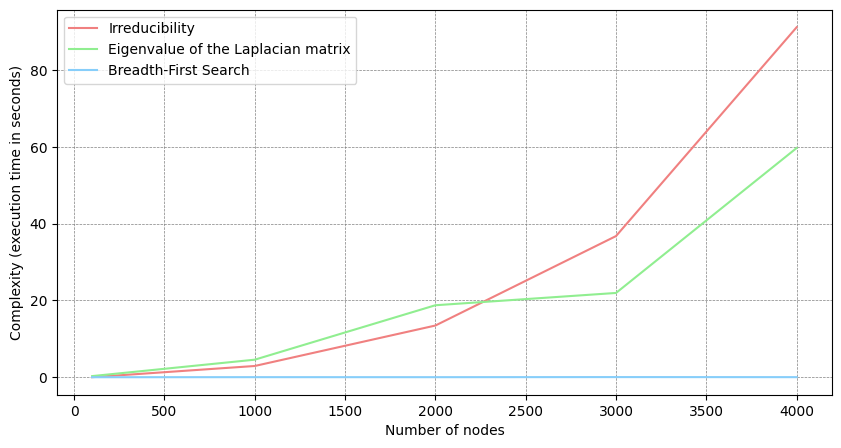

In [ ]:
irr = [t[1] for t in output_list]
lap = [t[0] for t in output_list]
bfs = [t[2] for t in output_list]

plt.figure(figsize=(10, 5))
plt.plot(K, irr, label='Irreducibility', color='lightcoral')
plt.plot(K, lap, label='Eigenvalue of the Laplacian matrix', color='lightgreen')
plt.plot(K, bfs, label='Breadth-First Search', color='lightskyblue')
plt.xlabel('Number of nodes')
plt.ylabel('Complexity (execution time in seconds)')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

The plot depicts how the runtime of different methods for checking graph connectivity varies with an increasing number of nodes. From the results, it's evident that:

Verifying graph connectivity by examining the irreducibility of the adjacency matrix exhibits the slowest runtime among the three methods, with a polynomial time complexity of $O(n^3)$, as indicated by the plot.

Similarly, inspecting the second smallest eigenvalue of the graph’s Laplacian results in a relatively slow runtime, estimated to fall between $O(n^2)$ and $O(n^3)$.

In contrast, traversing the graph using the BFS algorithm and verifying the reached node count against the total nodes yields notably faster results. The BFS algorithm's time complexity of $O(n + m)$, where $m$ is the number of edges, contributes to its efficiency.

Overall, the BFS method emerges as the most efficient approach for graph connectivity checks, surpassing the other methods in terms of runtime performance.

## Part 1.4

Now we want to compare the probability that a graph G is connected by running Monte Carlo simulations.

We produce two curves:

• the probability that a graph G is connected vs. p, for Erdos-Renyi graphs with K = 100

• the probability that a graph G is connected vs. K, for K ≤ 100, for r-regular random graphs with r = 2 and r = 8.

<h3> Monte Carlo Simulation for Erdos-Renyi Graphs

In [ ]:
num_simulations = 10000
K = 100
P = [0.01*i for i in range(1, 16) if i != 10]

In [ ]:
P

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15]

Let's compute the simulation for Erdos-Renyi graphs:

In [ ]:
num_connected_graphs_list = []
for p in P:
  print("Running simulation for p = {}".format(p))
  num_connected_graphs = 0
  for _ in range(0, num_simulations):
    graph = generate_erdos_renyi_graph(K, p)
    if(BFS(graph,  rm.randint(0, graph.number_of_nodes()-1))):
      num_connected_graphs+=1
  num_connected_graphs_list.append(num_connected_graphs)

Running simulation for p = 0.01
Running simulation for p = 0.02
Running simulation for p = 0.03
Running simulation for p = 0.04
Running simulation for p = 0.05
Running simulation for p = 0.06
Running simulation for p = 0.07
Running simulation for p = 0.08
Running simulation for p = 0.09
Running simulation for p = 0.11
Running simulation for p = 0.12
Running simulation for p = 0.13
Running simulation for p = 0.14


In [ ]:
num_connected_graphs_list = np.array(num_connected_graphs_list)
num_connected_graphs_list = num_connected_graphs_list/num_simulations

In [ ]:
num_connected_graphs_list

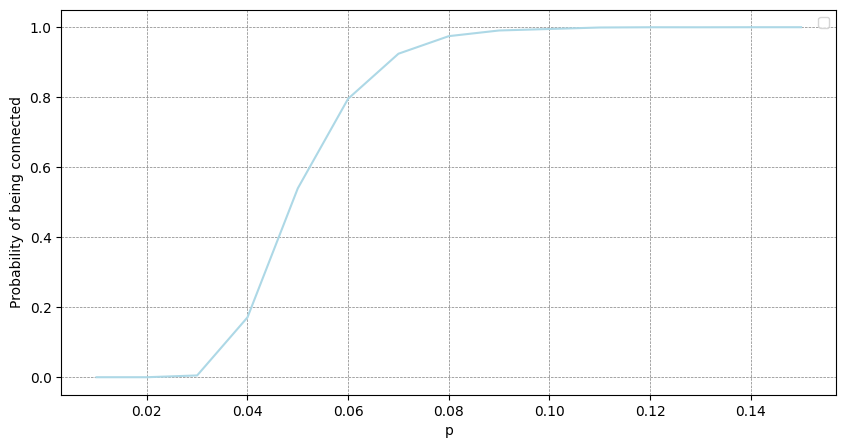

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(P, num_connected_graphs_list, color='lightblue')
plt.xlabel('p')
plt.ylabel('Probability of being connected')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


We conducted a Monte Carlo simulation, generating 10,000 Erdos-Renyi graphs with 100 nodes for each value of \( p \). Here, \( p \) represents the probability of adding an edge between two distinct nodes \( i \) and \( j \). We initiated the simulation with a range of small \( p \) values, starting from \( p = 0.01 \) up to \( p = 0.16 \).

The simulation output allowed us to create a plot illustrating the change in the probability of connectivity (y-axis) as the parameter \( p \) (x-axis) varies. The results revealed intriguing insights: even for very low \( p \) values, like \( p = 0.05 \), the likelihood of a graph being connected exceeds 0.5. Moreover, when \( p = 0.1 \), 99% of the graphs are connected, and the graph is almost always connected at \( p = 0.15 \). This indicates that despite the low probability of establishing edges between nodes, the graph maintains a high probability of connectivity.

<h3> Monte Carlo Simulation for r-regular random graph with r=2 and r=8

Let's compute the simulation for r-regular random graphs for r = 2

In [ ]:
K = [10*i for i in range(1,11)]

In [ ]:
num_connected_graphs_list_r2 = []
for k in K:
  print("Running simulation for K = {}".format(k))
  num_connected_graphs = 0
  for _ in range(0, num_simulations):
    graph = generate_r_regular_graphs(k, r=2)
    if(BFS(graph,  rm.randint(0, graph.number_of_nodes()-1))):
      num_connected_graphs+=1
  num_connected_graphs_list_r2.append(num_connected_graphs)

Running simulation for K = 10
Running simulation for K = 20
Running simulation for K = 30
Running simulation for K = 40
Running simulation for K = 50
Running simulation for K = 60
Running simulation for K = 70
Running simulation for K = 80
Running simulation for K = 90
Running simulation for K = 100


In [ ]:
num_connected_graphs_list_r2 = np.array(num_connected_graphs_list_r2)
num_connected_graphs_list_r2 = num_connected_graphs_list_r2/num_simulations

In [ ]:
num_connected_graphs_list_r2

array([0.5071, 0.3531, 0.2852, 0.2432, 0.2186, 0.2024, 0.1909, 0.1776,
       0.1638, 0.154 ])

Now we compute the simulation for r-regular random graphs for r = 8

In [ ]:
num_simulations = 10000
num_connected_graphs_list_r8 = []
for k in K:
  print("Running simulation for K = {}".format(k))
  num_connected_graphs = 0
  for _ in range(0, num_simulations):
    graph = generate_r_regular_graphs(k, r=8)
    if(BFS(graph,  rm.randint(0, graph.number_of_nodes()-1))):
      num_connected_graphs+=1
  num_connected_graphs_list_r8.append(num_connected_graphs)

Running simulation for K = 10
Running simulation for K = 20
Running simulation for K = 30
Running simulation for K = 40
Running simulation for K = 50
Running simulation for K = 60
Running simulation for K = 70
Running simulation for K = 80
Running simulation for K = 90
Running simulation for K = 100


In [ ]:
num_connected_graphs_list_r8 = np.array(num_connected_graphs_list_r8)
num_connected_graphs_list_r8 = num_connected_graphs_list_r8/num_simulations
num_connected_graphs_list_r8

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

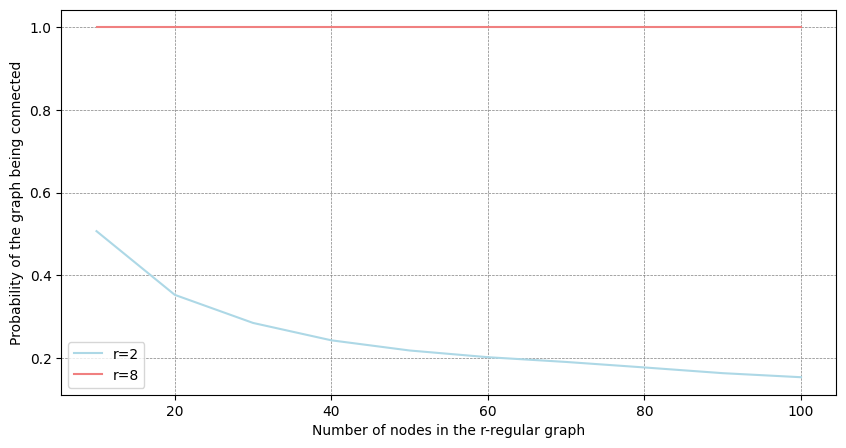

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(K, num_connected_graphs_list_r2, label='r=2', color='lightblue')
plt.plot(K, num_connected_graphs_list_r8, label='r=8', color='lightcoral')
plt.xlabel('Number of nodes in the r-regular graph')
plt.ylabel('Probability of the graph being connected')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

We conducted a Monte Carlo simulation, generating 1.000 r-random regular graphs with \( r = 2 \), and then with \( r = 8 \). For each graph, we verified its connectivity. We performed 10 different simulations, incrementing the number of nodes \( K \) by 10 each time, simulating from \( K = 10 \) to \( K = 100 \).

Using the results from the Monte Carlo simulation, we created the curves, illustrating how the probability of connectivity (y-axis) changes as we increase the number of nodes (x-axis). It's evident from the plot that a graph where every node has degree 2 exhibits a low probability of connectivity, even for small graphs with only 20 nodes. As the number of nodes increases to 100, this probability approaches zero. These outcomes are not unexpected: in a graph where every node has degree two, achieving connectivity solely relies on a ring topology, which can be challenging to attain with randomly added edges. Therefore, this configuration with \( r = 2 \) is impractical in real-world scenarios, where even the smallest network graphs typically have thousands of nodes.

Conversely, the simulation for \( r = 8 \) yielded contrasting results: the graph is virtually always connected, even with 100 nodes. This observation aligns with expectations, considering that the number of edges in an \( r \)-regular graph is \( \frac{nr}{2} \). When \( r = 8 \), this quantity significantly surpasses \( n - 1 \), the minimum number of edges required for connectivity in a graph.

# Assignment - Part 2

In [ ]:
import numpy as np
import networkx as nx
#%pip install fnss
import fnss
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import heapq

## Numerical values

In [ ]:
C = 10 #Network capacity in Gbit/s
tao = 5 * 10**-6 # Propagation delay in seconds
Lf = 32000 # File size in Gbit
Lo = 32000  # Output data size in Gbit
mean_x = 8*60*60  # Mean X in seconds (8 hours)
T0 =  30 # Setup time in seconds
xsi = 0.1 # Cost factor
f = 48/1500 # TCP overhead fraction
n = 64 # Number of ports per switch

In [ ]:
#baselines
time_A = T0 + mean_x
S = time_A + xsi*time_A

## Part 2.1 

### Creating Fat-tree and Jellyfish topology

In [ ]:
# Fat-tree topology
fat = fnss.fat_tree_topology(n)
fat_att = nx.get_node_attributes(fat,name = 'type')
servers = [item[0] for item in fat_att.items() if item[1]=='host']
# Jellyfish topology
k = 2048
jelly = nx.random_regular_graph(32, k)
labels = {i: 'switch' for i in jelly.nodes()}
jelly.add_nodes_from(list(range(2048, 65537+2048)))
for i in range(2048, 65537+2048):
    labels[i] = 'host'
for i in range(2048):
    for j in range(2048+i*32, 2048+i*32+32):
        jelly.add_edge(i,j)

### Algorithm to evaluate the mean response time 

In [ ]:
def algorithm(topo,N,t,servers):
    # Select a random server from the list of available servers
    server_A = random.choice(servers)
    servers.remove(server_A)
    
    # Calculate the number of TCP connections based on parameters
    tcp_connections = (Lf/N)*(1+f)
    
    # Find the shortest paths from the selected server to all other nodes in the network
    shortest_paths = nx.shortest_path(topo, source=server_A, weight=True, method='dijkstra')
    
    # Create a list to store the nearest hosts to the selected server
    nearest_hosts = []

    # Filter out the nearest host nodes with a path length greater than 1
    sel = {i: shortest_paths[i] for i in shortest_paths.keys() if t[i] == 'host' and len(shortest_paths[i]) > 1}
    
    # Sort the selected hosts based on the length of their shortest paths
    nearest_hosts = sorted(list(sel.items()), key=lambda x: len(x[1]))[0:N]
    
    # Calculate the number of hops from server A to the N nearest servers
    hops = [len(elem[1]) - 1 for elem in nearest_hosts]

    # Calculate the transmission time for each hop
    T_i = [2 * tao * hop for hop in hops]

    # Calculate the denominator for calculating Theta_i
    denom = sum([1 / ti for ti in T_i])

    # Calculate the capacity of each server to process requests
    Theta_i = [C / (denom * ti) for ti in T_i]

    # Calculate the transmission speed for each server
    s_t = [tcp_connections / x for x in Theta_i]

    # Generate random exponential data for X_i representing processing time at each server
    X_i = np.random.exponential(scale=mean_x/N, size=N)
    
    # Generate random uniform data for output representing amount of output data
    output = np.random.uniform(0, 2 * Lo / N, size=N)
    
    # Calculate response times for each server
    response_times = [output[i] / Theta_i[i] for i in range(N)]

    # Calculate total time for each server, considering transmission, processing, and response times
    total_time = [sum(x) for x in zip(s_t, X_i, response_times)]
    
    # Adjust total time with initial time and return values for evaluation
    return (max(total_time) / time_A, (sum(X_i) + N * T0) / S)


### Simulation to compute the mean response time and the job running cost

In [ ]:
iterations = 100
time_jelly, time_fat = [], []
job_jelly, job_fat = [], []
for N in tqdm(range(1, 10002, 100)):
    jelly_time = []
    fat_time = []
    jelly_job = []
    fat_job = []
    for _ in range(1,iterations):
        jelly_result = algorithm(jelly,N,labels,list(range(2048, 65537)))
        fat_result = algorithm(fat,N,fat_att,servers)
        jelly_time.append(jelly_result[0])
        fat_time.append(fat_result[0])
        jelly_job.append(jelly_result[1])
        fat_job.append(fat_result[1])
    time_jelly.append(sum(jelly_time)/iterations)
    time_fat.append(sum(fat_time)/iterations)
    job_jelly.append(sum(jelly_time)/iterations+xsi*(sum(jelly_job)/iterations))
    job_fat.append(sum(fat_time)/iterations+xsi*(sum(fat_job)/iterations))

100%|██████████| 101/101 [3:09:02<00:00, 112.30s/it] 


In [ ]:
N_list = [i for i in range(1,10002,100)]

## Part 2.2

### Plot mean response time $E[R]$ as a function of $N$

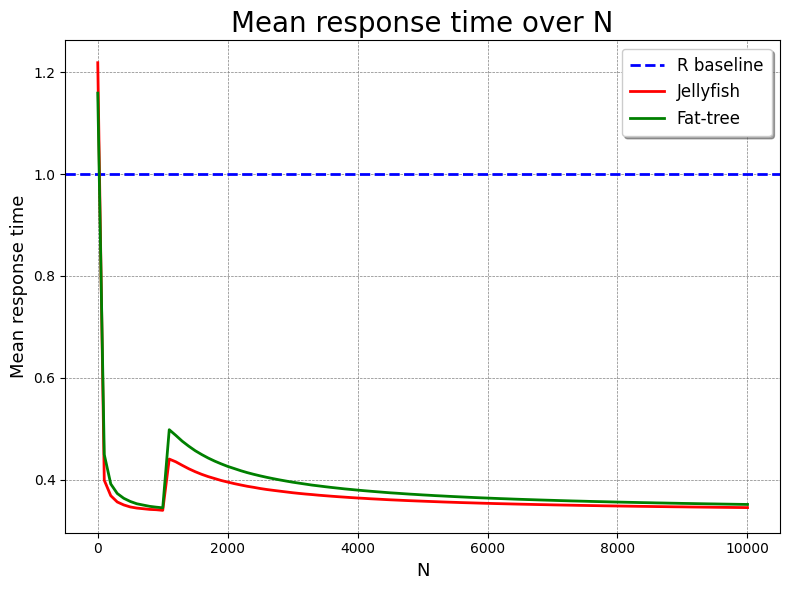

In [ ]:
plt.figure(figsize=(8,6), tight_layout=True)
plt.style.use('default')
plt.axhline(y=1, linestyle='--', linewidth=2, color = 'blue', label = 'R baseline')
plt.plot(N_list, time_jelly, '-', linewidth=2, color = 'red', label = 'Jellyfish')
plt.plot(N_list, time_fat, '-', linewidth=2, color = 'green', label = 'Fat-tree')
plt.xlabel('N', size=13)
plt.ylabel('Mean response time', size=13)
plt.title('Mean response time over N', size=20)
plt.legend(fontsize = 12, loc='upper right'
           ,fancybox=True, framealpha=1, shadow=True, borderpad=0.5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()

## Part 2.3

### Plot Job running cost $S$ as a function of $N$ 

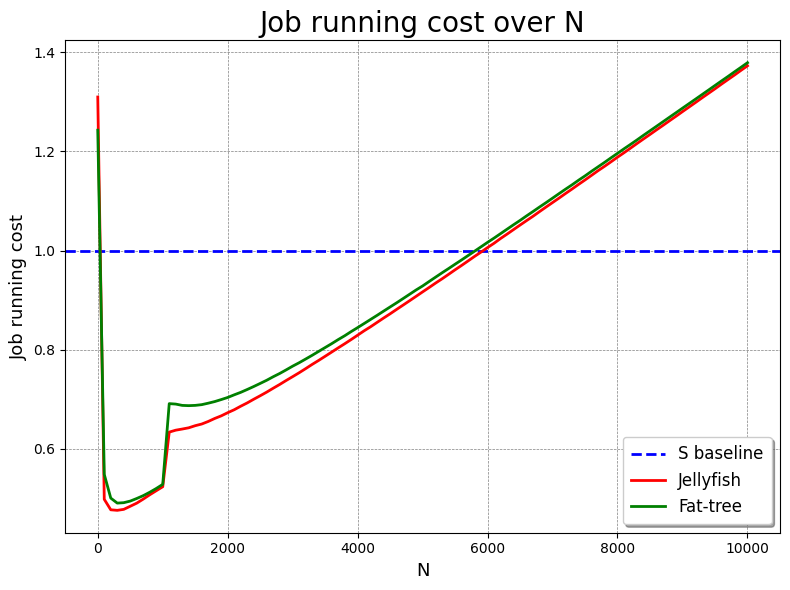

In [ ]:
plt.figure(figsize=(8,6), tight_layout=True)
plt.style.use('default')
plt.axhline(y=1, linestyle='--', linewidth=2, color = 'blue', label = 'S baseline')
plt.plot(N_list, job_jelly, '-', linewidth=2, color = 'red', label = 'Jellyfish')
plt.plot(N_list, job_fat, '-', linewidth=2, color = 'green', label = 'Fat-tree')
plt.xlabel('N', size=13)
plt.ylabel('Job running cost', size=13)
plt.title('Job running cost over N', size=20)
plt.legend(fontsize = 12,loc='lower right'
           ,fancybox=True, framealpha=1, shadow=True, borderpad=0.5)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()

## Part 2.4

### Numerical value of the optimal number of servers (minimizes $S$)

#### fatTree

In [ ]:
FT_min = np.min(job_fat)
FT_min_idx = job_fat.index(FT_min)

In [ ]:
FT_min, FT_min_idx+1

(12845.85586617401, 29)

In [ ]:
FT_max = np.max(job_fat)
FT_max_idx = job_fat.index(FT_max)

In [ ]:
FT_max, FT_max_idx+1

(41680.8678751328, 10000)

* Minimum job running cost for fat tree is at number of servers = 30 for a total of 12847 seconds.
* Maximum job running cost for fat tree is at the maximum number of servers (after the break point at N=1000, the cost increases linearly with the number of servers) for a total of 41682 seconds.

#### Jellyfish

In [ ]:
JF_min = np.min(job_jelly)
JF_min_idx = job_jelly.index(JF_min)

In [ ]:
JF_min, JF_min_idx+1

(12536.648895880277, 267)

In [ ]:
JF_max = np.max(job_jelly)
JF_max_idx = job_jelly.index(JF_max)

In [ ]:
JF_max, JF_max_idx+1

(41478.03910143391, 10000)

* Minimum job running cost for jelly fish is at number of servers = 257 for a total of 12533 seconds.
* Maximum job running cost for jelly fish is at the maximum number of servers like fat tree for a total of 41479 seconds.